# Dataset


In the emnist dataset the image are 28 x 28 pixels 

In [5]:
! pip install np_utils

In [4]:
! unzip Data/emnist.zip -d Data

Archive:  Data/emnist.zip
  inflating: Data/emnist_test.csv    
  inflating: Data/emnist_train.csv   


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.backend import clear_session
from keras.utils import to_categorical



In [9]:
#import train and test dataset
train_df = pd.read_csv('emnist_train.csv')
test_df = pd.read_csv('emnist_test.csv')

In [10]:
train_df.head()

,char,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,r,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,n,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(train_df.shape)

(112800, 786)


In [12]:
X_train = train_df.drop(['char','0'], axis=1).values
y_train = train_df['0'].values

In [ ]:
X_test = test_df.drop(['char','0'], axis=1).values
y_test = test_df['0'].values

In [13]:
print(X_train.shape)
print(y_train.shape)

(112800, 784)
(112800,)


In [14]:
# create a dataframe that save all the char type and the corrispective values 
decoding_feature_map =  test_df[['char','0']]

In [15]:
decoding_feature_map = decoding_feature_map.drop_duplicates(ignore_index=False)
number_of_classes = decoding_feature_map.shape[0]
print(number_of_classes)

47


In [16]:
decoding_feature_map

,char,0
0,g,41
1,e,39
2,9,9
3,Q,26
4,q,44
5,X,33
6,E,14
7,B,11
8,3,3
9,C,12


In [18]:
# Since the image are 28 x 28 pixel we set these values for the reshape 
W,H = 28,28

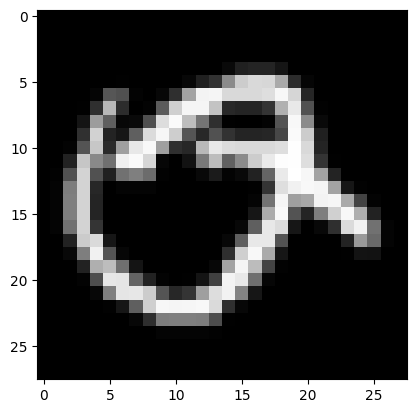

In [19]:
# just to check  plot a image
image = X_test[3,:].reshape(W,H)
plt.imshow(image, cmap='gray')


In [20]:
# We need a reshape in order to give to the DL models
X_train = X_train.reshape(-1,W,H,1)
X_test = X_test.reshape(-1,W,H,1)

In [21]:
print(X_train.shape)
print(X_test.shape)

(112800, 28, 28, 1)
(18800, 28, 28, 1)


In [22]:
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [23]:
print(y_train.shape)
print(y_test.shape)

(112800, 47)
(18800, 47)


# Model CNN + LSTM

In [24]:
# CNN
clear_session()
cnn_lstm_model = Sequential()
cnn_lstm_model.add(layers.Conv2D(filters= 32,kernel_size=(3, 3), activation='relu',padding="same",input_shape=(W, H, 1)))
cnn_lstm_model.add(layers.MaxPooling2D(pool_size=(3,3),strides=2))
cnn_lstm_model.add(layers.Conv2D(filters= 64,kernel_size=(3, 3), activation='relu',padding="same"))
cnn_lstm_model.add(layers.MaxPooling2D(pool_size=(3,3),strides=2))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.Reshape(target_shape=((1, 2304)), name='reshape'))
cnn_lstm_model.add(layers.Bidirectional(layers.LSTM(units=128, return_sequences=True,dropout=0.2)))
cnn_lstm_model.add(layers.Bidirectional(layers.LSTM(units=128, return_sequences=True,dropout=0.2)))
cnn_lstm_model.add(layers.Flatten())
cnn_lstm_model.add(layers.Dense(units=128, activation='relu'))
cnn_lstm_model.add(layers.Dense(units=number_of_classes, activation='softmax'))
cnn_lstm_model.summary()
#model.add(layers.Reshape(target_shape=((1, 1568)), name='reshape'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 2304)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1, 256)              │       2,491,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 256)              │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,943,663 (11.23 MB)

 Trainable params: 2,943,535 (11.23 MB)

 Non-trainable params: 128 (512.00 B)

In [25]:
cnn_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# the early stopping stop the train if the validation loss isn't improve in 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# Train and Evaluetion

In [ ]:
history = cnn_lstm_model.fit(X_train,
                    y_train,
                    epochs =30,
                    batch_size = 32,
                    verbose = 1,
                    validation_split = 0.1,
                    callbacks=[early_stopping])

Epoch 1/30
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 376s 115ms/step - accuracy: 0.7320 - loss: 0.8948 - val_accuracy: 0.8387 - val_loss: 0.4693
Epoch 2/30
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 368s 111ms/step - accuracy: 0.8479 - loss: 0.4246 - val_accuracy: 0.8480 - val_loss: 0.4379
Epoch 3/30
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 388s 113ms/step - accuracy: 0.8645 - loss: 0.3751 - val_accuracy: 0.8615 - val_loss: 0.3756
Epoch 4/30
1953/3173 ━━━━━━━━━━━━━━━━━━━━ 2:14 110ms/step - accuracy: 0.8723 - loss: 0.3479

In [ ]:
cnn_lstm_model.evaluate(X_test,y_test)